## Twitch popularity

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
df_twitch_global = pd.read_csv('Twitch_global_data.csv')

In [3]:
df_twitch = pd.read_csv('Twitch_game_data.csv', encoding='latin-1')

In [4]:
df_twitch_global.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"


In [5]:
df_twitch_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            64 non-null     int64 
 1   Month           64 non-null     int64 
 2   Hours_watched   64 non-null     int64 
 3   Avg_viewers     64 non-null     int64 
 4   Peak_viewers    64 non-null     int64 
 5   Streams         64 non-null     int64 
 6   Avg_channels    64 non-null     int64 
 7   Games_streamed  64 non-null     object
dtypes: int64(7), object(1)
memory usage: 4.1+ KB


In [6]:
df_twitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12750 entries, 0 to 12749
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              12750 non-null  int64  
 1   Game              12749 non-null  object 
 2   Month             12750 non-null  int64  
 3   Year              12750 non-null  int64  
 4   Hours_watched     12750 non-null  int64  
 5   Hours_Streamed    12750 non-null  object 
 6   Peak_viewers      12750 non-null  int64  
 7   Peak_channels     12750 non-null  int64  
 8   Streamers         12750 non-null  int64  
 9   Avg_viewers       12750 non-null  int64  
 10  Avg_channels      12750 non-null  int64  
 11  Avg_viewer_ratio  12750 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.2+ MB


In [7]:
df_twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [6]:
# Tamaño del dataset
df_twitch.shape

(12750, 12)

In [4]:
missing_values = df_twitch.isnull().sum()
missing_values

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [5]:
df_twitch = df_twitch.dropna()

In [8]:
def transform_hours(x):
    return (x/60)    

In [ ]:
df_twitch_global['Hours_watched'] = df_twitch_global['Hours_watched'].apply(transform_hours)

In [9]:
df_twitch_global.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,8.004032e+06,646355,1275257,7701675,20076,"12,149"
1,2016,2,7.364332e+06,635769,1308032,7038520,20427,"12,134"
2,2016,3,8.177822e+06,660389,1591551,7390957,20271,"12,234"
3,2016,4,6.299591e+06,525696,1775120,6869719,16791,"12,282"
4,2016,5,7.497277e+06,605432,1438962,7535519,19394,"12,424"


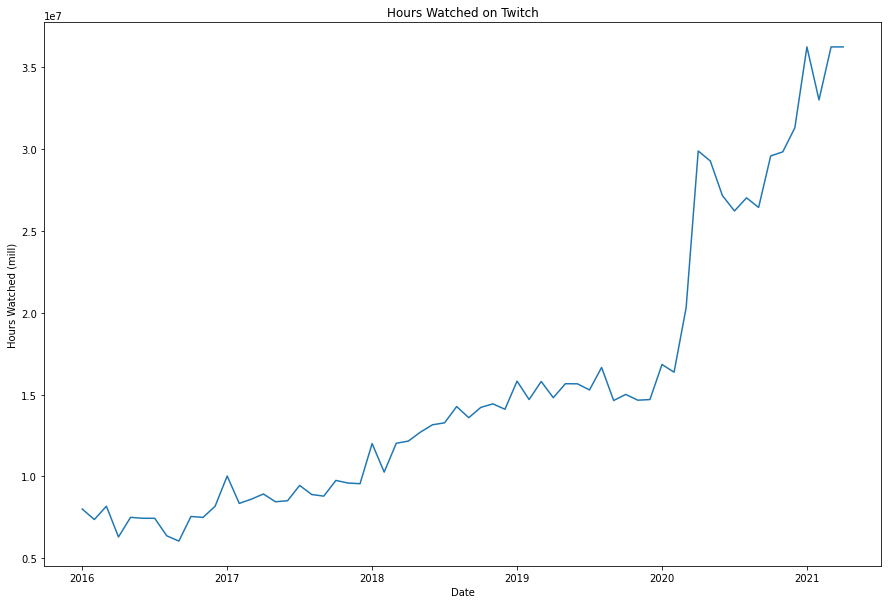

In [10]:
# Horas vistas en Twitch por mes
year_list = []
year = 0
for index, row in df_twitch_global.iterrows(): #Iteramos y por cada mes enero pasamos al siguiente año en la etiqueta de datos del eje X
    if row['Month'] == 1:
        year_list.append(year)
    year = year + 1

fig, ax = plt.subplots(figsize=(15,10))
# plotting each month's hours watched in billions
ax.plot(df_twitch_global['Hours_watched'])
ax.set_ylabel('Hours Watched (mill)')
ax.set_xlabel('Date')
ax.set_title('Hours Watched on Twitch')
ax.set_xticks(year_list)
ax.set_xticklabels(['2016', '2017', '2018', '2019', '2020', '2021'])
plt.show()

In [6]:
# Unificamos fechas para formatearlas en una columna de tipo date
df_twitch['Day'] = '01'
df_twitch['date'] = pd.to_datetime(df_twitch[['Year', 'Month', 'Day']])
df_twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Day,date
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,01,2016-01-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,01,2016-01-01
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26,01,2016-01-01
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29,01,2016-01-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,01,2016-01-01


In [7]:
df_twitch.drop(['Month', 'Year', 'Day'], axis=1)

,Rank,Game,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,date
0,1,League of Legends,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29,2016-01-01
1,2,Counter-Strike: Global Offensive,47832863,830105 hours,372654,2197,120849,64378,1117,57.62,2016-01-01
2,3,Dota 2,45185893,433397 hours,315083,1100,44074,60815,583,104.26,2016-01-01
3,4,Hearthstone,39936159,235903 hours,131357,517,36170,53749,317,169.29,2016-01-01
4,5,Call of Duty: Black Ops III,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...
12745,196,Cuphead,795329,31721 hours,90364,98,7795,1106,44,25.07,2021-04-01
12746,197,Hades,794472,52755 hours,36447,152,8663,1104,73,15.06,2021-04-01
12747,198,Epic Seven,778750,18362 hours,11670,47,997,1083,25,42.41,2021-04-01
12748,199,Pok<U+00E9>mon Platinum,777305,22380 hours,61580,76,2837,1081,31,34.73,2021-04-01


<AxesSubplot:ylabel='Game'>

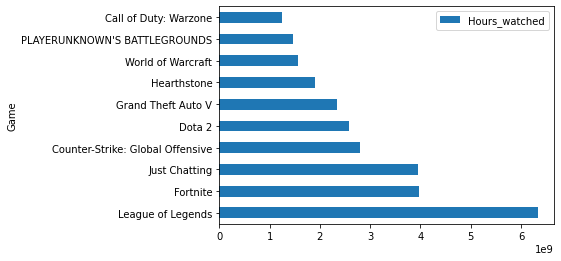

In [8]:
# Clasificamos qué juegos son los más vistos desde 2016
df_twitch_games = df_twitch.groupby(['Game'])['Hours_watched'].sum().reset_index()
df_twitch_games.sort_values(['Hours_watched'], ascending=False).head(10).plot(kind='barh', y='Hours_watched', x='Game')


In [18]:
# Agrupamos los juegos más vistos desde 2020
twitch_2020 = df_twitch['date'] > '2019'

<AxesSubplot:ylabel='Game'>

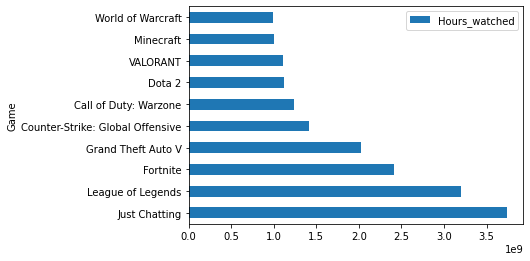

In [17]:
# Clasificamos qué juegos son los más vistos desde 2020
df_twitch_2020 = df_twitch[twitch_2020]
df_twitch_games_2020 = df_twitch_2020.groupby(['Game'])['Hours_watched'].sum().reset_index()
df_twitch_games_2020.sort_values(['Hours_watched'], ascending=False).head(10).plot(kind='barh', y='Hours_watched', x='Game')

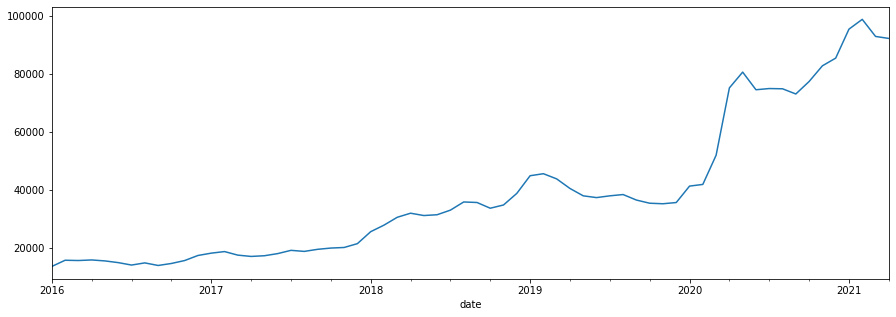

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
df_twitch_year = df_twitch.groupby(['date'])['Avg_channels'].sum().plot()

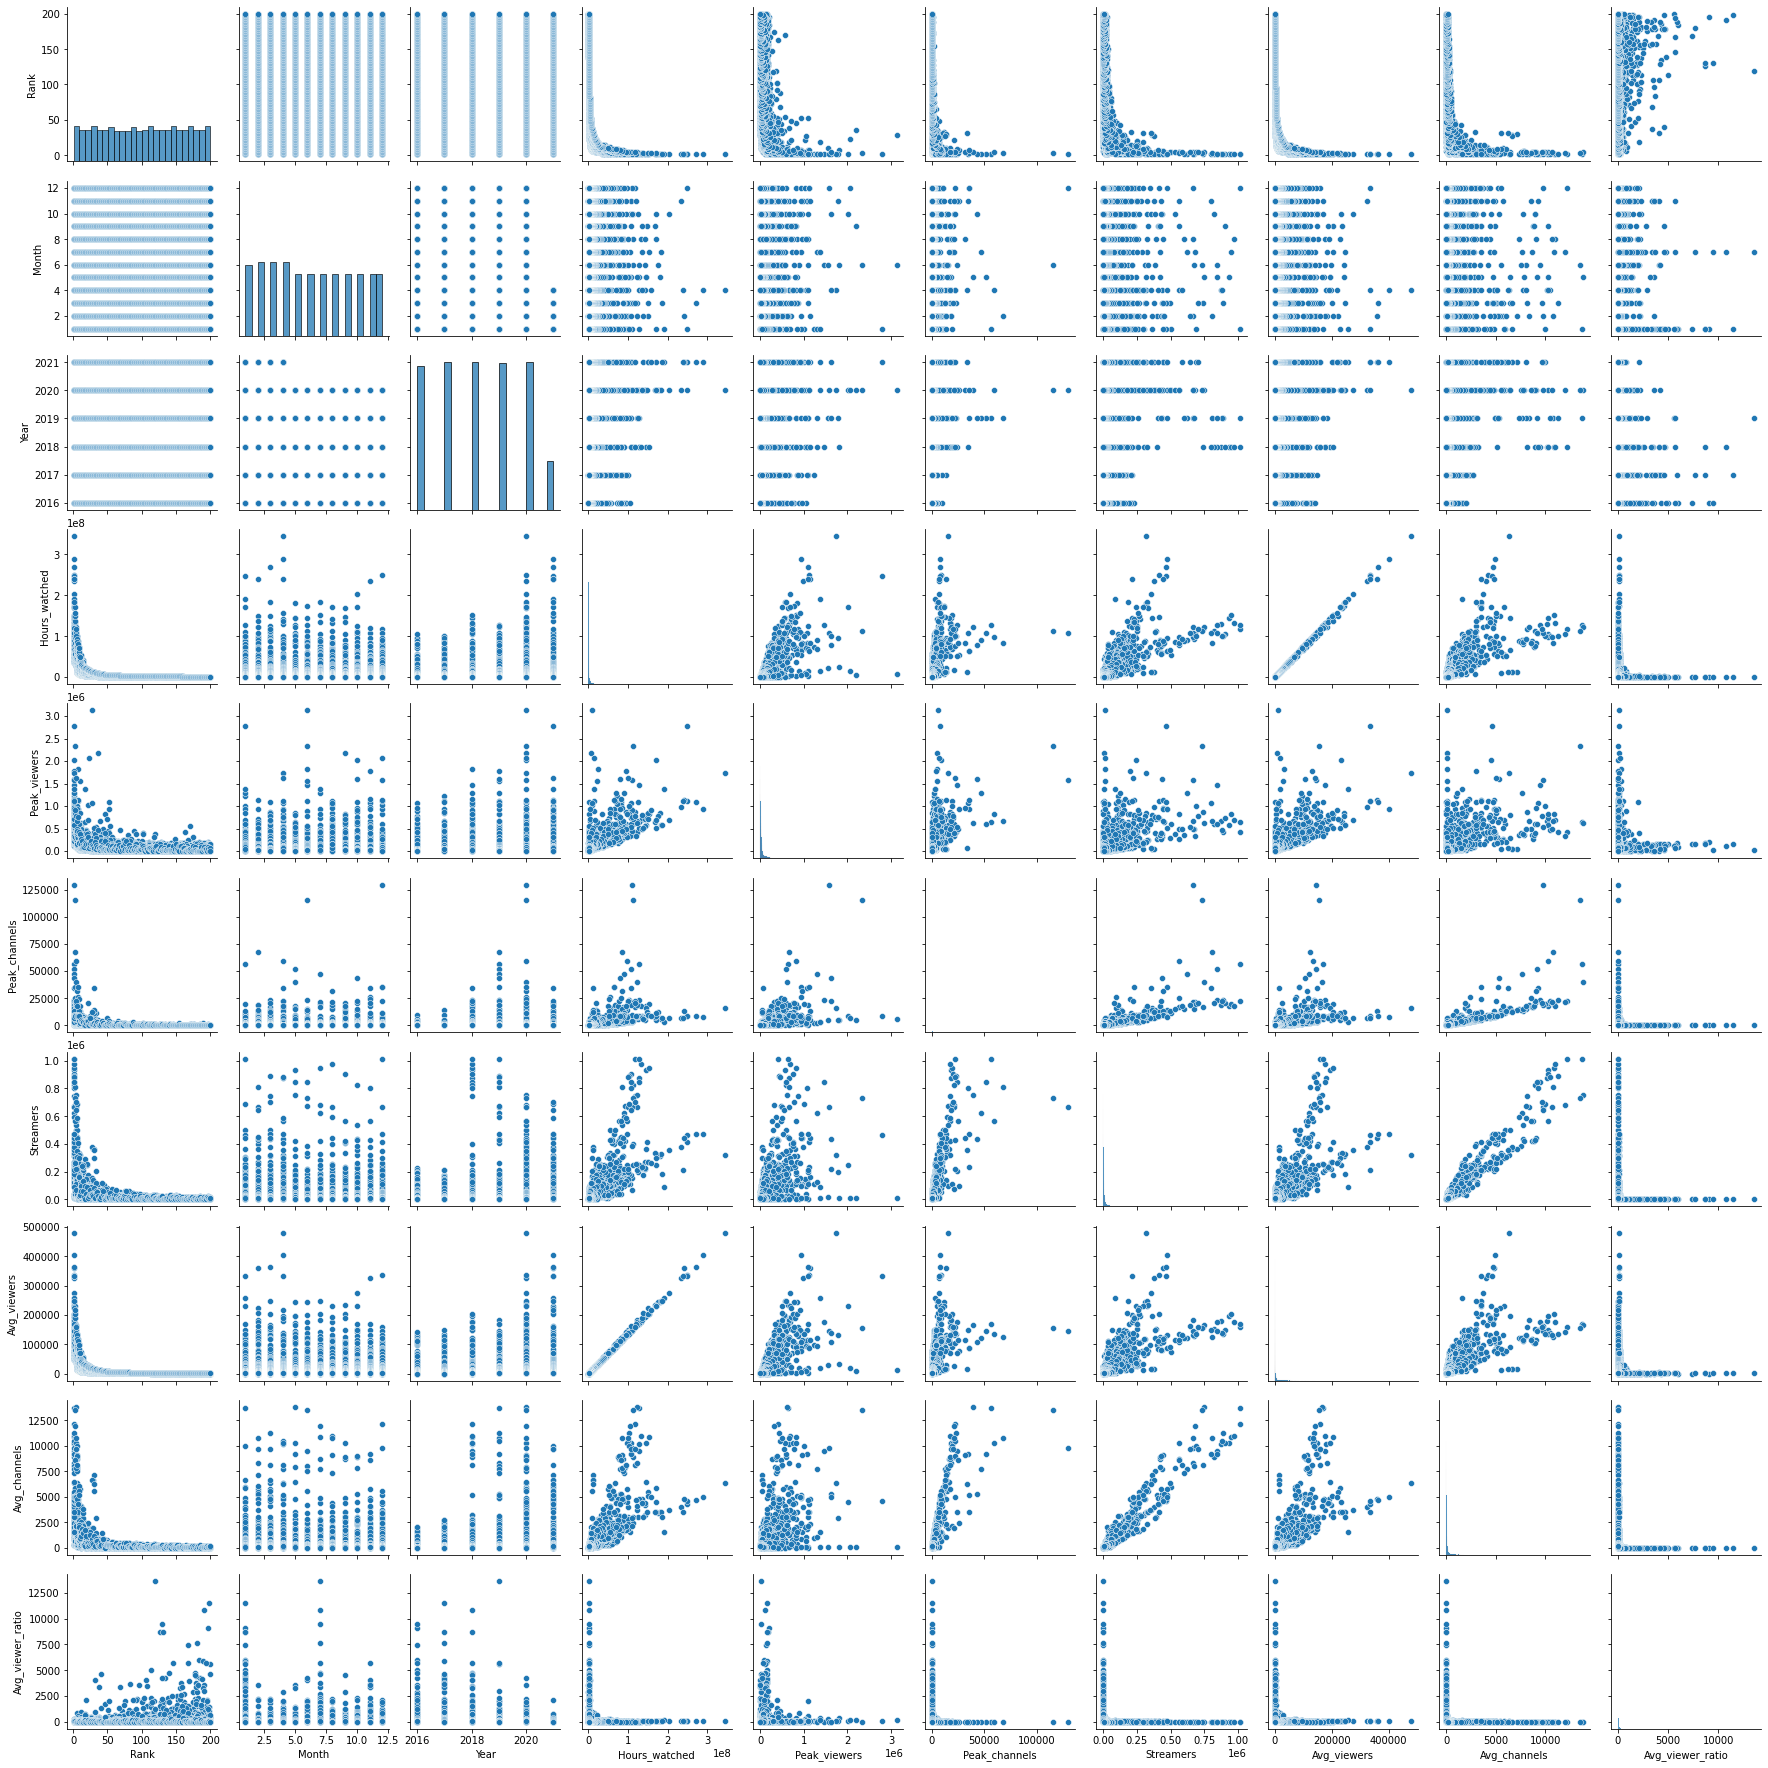

In [13]:
sns.pairplot(df_twitch)

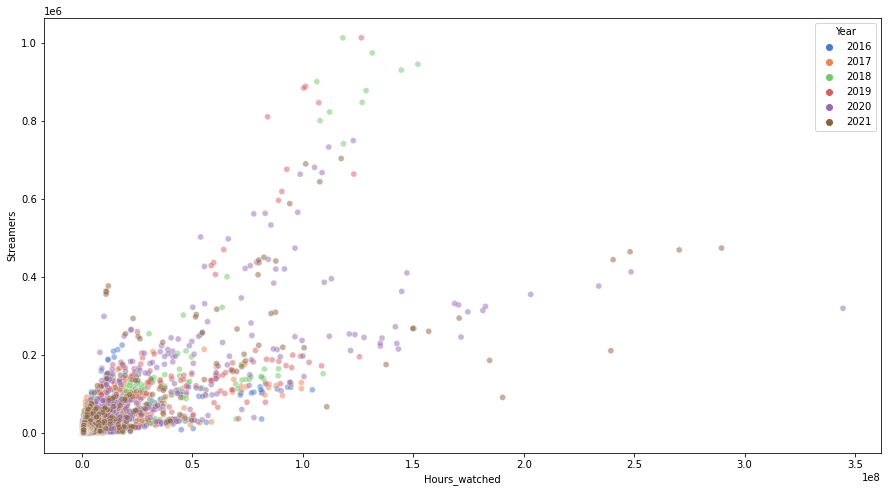

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "Hours_watched", y = "Streamers", 
                hue = "Year", sizes=(40, 400), alpha=.5, palette="muted",
                data = df_twitch);

In [18]:
twitch_corr = df_twitch.corr()
twitch_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
Rank,1.000,-0.003,-0.002,-0.390,-0.346,-0.251,-0.354,-0.390,-0.339,0.072
Month,-0.003,1.000,-0.139,-0.011,-0.020,0.005,-0.012,-0.013,-0.013,-0.037
Year,-0.002,-0.139,1.000,0.137,0.136,0.117,0.132,0.137,0.155,-0.062
Hours_watched,-0.390,-0.011,0.137,1.000,0.734,0.547,0.758,1.000,0.767,-0.019
Peak_viewers,-0.346,-0.020,0.136,0.734,1.000,0.560,0.588,0.732,0.582,0.066
Peak_channels,-0.251,0.005,0.117,0.547,0.560,1.000,0.756,0.547,0.798,-0.028
Streamers,-0.354,-0.012,0.132,0.758,0.588,0.756,1.000,0.757,0.962,-0.043
Avg_viewers,-0.390,-0.013,0.137,1.000,0.732,0.547,0.757,1.000,0.766,-0.019
Avg_channels,-0.339,-0.013,0.155,0.767,0.582,0.798,0.962,0.766,1.000,-0.039
Avg_viewer_ratio,0.072,-0.037,-0.062,-0.019,0.066,-0.028,-0.043,-0.019,-0.039,1.000


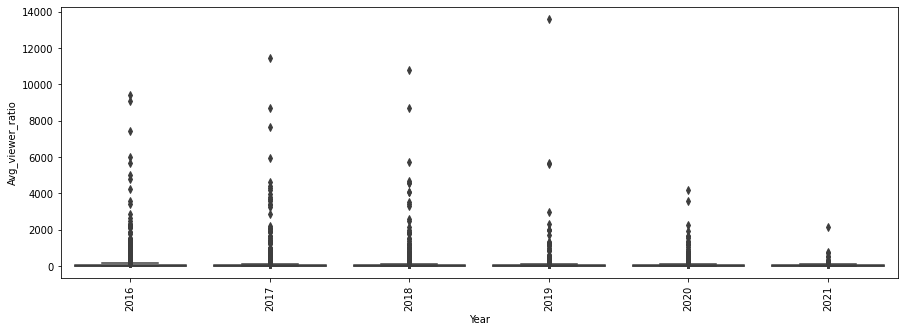

In [21]:
ax = sns.boxplot(data = df_twitch, x='Year',y=('Avg_viewer_ratio'))
for item in ax.get_xticklabels():
    item.set_rotation(90)

### Exportamos los 2 conjuntos de datos: Steam 2016-2021 y Steam post covid

In [20]:
df_twitch.to_csv(r'Twitch data processed.csv', index = False, header=True)

In [21]:
df_twitch_2020.to_csv(r'Twitch data games post covid.csv', index = False, header=True)